In [1]:
import glob
import importlib
import os

In [2]:
import cv2
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import nitelite_mapmaker

In [5]:
importlib.reload(nitelite_mapmaker)

<module 'nitelite_mapmaker' from '/Users/Shared/repos/NITELite-mapmaker/nitelite_mapmaker/__init__.py'>

In [6]:
from nitelite_mapmaker import observations

# Settings

In [7]:
flight_name = '220513-FH135'
data_dir = '/Users/Shared/data'
google_drive_dir = '/Users/zhafensaavedra/Google Drive'

In [8]:
image_dir = os.path.join(data_dir, 'nitelite/images', flight_name, '23085686' )
metadata_dir = os.path.join(google_drive_dir, 'Shared drives/NITELite/Data & Analysis/Old NITELite Flights', flight_name, 'data')
metadata_fp = os.path.join(metadata_dir, 'CollatedImageLog.csv')

In [9]:
IMG_SHAPE = (1200, 1920)
figsize = np.array(IMG_SHAPE)/50.
plt.rcParams['figure.figsize'] = figsize

In [10]:
decent_test_seeds = [111, 1631489, ]
rng = np.random.default_rng(decent_test_seeds[0])

# Analysis

In [11]:
flight = observations.Flight(image_dir=image_dir, metadata_fp=metadata_fp)

## Inspect Metadata

In [12]:
metadata = pd.read_csv(metadata_fp)
# Handle any extra whitespace
metadata.rename(columns=lambda x: x.strip(), inplace=True)

In [13]:
metadata

odroid_time                       obc_time  cameraNum  \
0      May 13 20:27:39         20220513_202739_536003          0   
1      May 13 20:27:39         20220513_202739_578439          0   
2      May 13 20:27:40         20220513_202740_620630          0   
3      May 13 20:27:40         20220513_202740_662081          0   
4      May 13 20:27:40         20220513_202740_703530          0   
...                ...                            ...        ...   
33781  May 14 00:55:48    20220514_005548_-1679685015          2   
33782  May 14 00:55:48    20220514_005548_-1679643963          2   
33783  May 14 00:55:48    20220514_005548_-1679602587          0   
33784  May 14 00:55:49    20220514_005549_-1679431529          1   
33785  May 14 00:55:49    20220514_005549_-1679260654          2   

       serial_number  exposure_time  idx  internal_temp  \
0           23085686             50    0           57.0   
1           23085686             50    1           57.0   
2           23085686             50    2           57.0   
3           23085686             50    3           57.0   
4           23085686             50    4           57.0   
...              ...            ...  ...            ...   
33781       23085688             50    3           45.0   
33782       23085688             50    4           45.0   
33783       23085686            100    0           44.0   
33784       23085687            100    0           46.0   
33785       23085688            100    0           45.0   

                                                fileName     timeStamp  \
0        /home/pi/Pictures/23085686/20220413_202739_5...  1.652492e+09   
1        /home/pi/Pictures/23085686/20220413_202739_5...  1.652492e+09   
2        /home/pi/Pictures/23085686/20220413_202740_6...  1.652492e+09   
3        /home/pi/Pictures/23085686/20220413_202740_6...  1.652492e+09   
4        /home/pi/Pictures/23085686/20220413_202740_7...  1.652492e+09   
...                                                  ...           ...   
33781    /home/pi/Pictures/23085688/20220414_005548_-...  1.652508e+09   
33782    /home/pi/Pictures/23085688/20220414_005548_-...  1.652508e+09   
33783    /home/pi/Pictures/23085686/20220414_005548_-...  1.652508e+09   
33784    /home/pi/Pictures/23085687/20220414_005549_-...  1.652508e+09   
33785    /home/pi/Pictures/23085688/20220414_005549_-...  1.652508e+09   

       imuGyroZ     GPSLat    GPSLong      GPSAlt  GPSSpeed  
0     -0.000219  40.036992 -86.112609  268.354093  0.213054  
1     -0.000219  40.036992 -86.112609  268.354093  0.213054  
2      0.000759  40.036995 -86.112605  267.442976  0.255445  
3      0.000759  40.036995 -86.112605  267.442976  0.255445  
4      0.000759  40.036995 -86.112605  267.442976  0.255445  
...         ...        ...        ...         ...       ...  
33781 -0.000202  39.683741 -86.442772  339.986000  4.197000  
33782 -0.000202  39.683741 -86.442772  339.986000  4.197000  
33783 -0.000202  39.683741 -86.442772  339.986000  4.197000  
33784  0.001201  39.683741 -86.442772  339.986000  4.197000  
33785  0.001201  39.683741 -86.442772  339.986000  4.197000  

[33786 rows x 14 columns]

In [14]:
metadata.describe()

cameraNum  serial_number  exposure_time           idx  \
count  33786.000000   3.378600e+04   33786.000000  33786.000000   
mean       1.000000   2.308569e+07      58.333333      1.666667   
std        0.816509   8.165087e-01      18.634176      1.490734   
min        0.000000   2.308569e+07      50.000000      0.000000   
25%        0.000000   2.308569e+07      50.000000      0.000000   
50%        1.000000   2.308569e+07      50.000000      1.500000   
75%        2.000000   2.308569e+07      50.000000      3.000000   
max        2.000000   2.308569e+07     100.000000      4.000000   

       internal_temp     timeStamp      imuGyroZ        GPSLat       GPSLong  \
count   33786.000000  3.378600e+04  33786.000000  33786.000000  33786.000000   
mean       44.622980  1.652500e+09     -0.006298     39.816897    -86.258797   
std        12.773798  4.625602e+03      0.233844      0.160045      0.133590   
min        11.000000  1.652492e+09     -1.715047     39.629217    -86.454507   
25%        37.000000  1.652496e+09     -0.020241     39.677696    -86.413550   
50%        45.000000  1.652500e+09      0.000110     39.725937    -86.188924   
75%        53.000000  1.652504e+09      0.013595     40.007036    -86.132826   
max        68.000000  1.652508e+09      2.356716     40.064361    -86.111722   

             GPSAlt      GPSSpeed  
count  33786.000000  33786.000000  
mean    9817.340283      6.990078  
std     6031.469374      3.831143  
min      236.403773      0.012199  
25%     3237.895325      4.197000  
50%    14152.147300      6.898779  
75%    14576.271222      9.639061  
max    15879.146302     20.183238

## Inspect Images

In [15]:
fps = glob.glob(os.path.join(image_dir,'*.raw'))

In [16]:
fp = rng.choice(fps)

In [17]:
dtype = np.dtype(np.uint16)
# dtype = dtype.newbyteorder('>') # This doesn't seem to do anything...

In [18]:
raw_img = np.fromfile(fp, dtype=np.uint16)

In [19]:
raw_img = raw_img.reshape(IMG_SHAPE)

In [20]:
img = cv2.cvtColor(raw_img, cv2.COLOR_BayerBG2RGB)

In [21]:
img = img / 4092

In [22]:
# since the raw files are bayer sampled
# the red pixels are at "[0::2,0::2]" locations,
# green are at "[0::2,1::2]" and "[1::2,0::2]",
# and blue at "[1::2,1::2]"
red = raw_img[0::2,0::2]
green1 = raw_img[0::2,1::2]
green2 = raw_img[1::2,0::2]
green_avg = 0.5*(green1 + green2)
blue = raw_img[1::2,1::2]

In [23]:
crude_img = np.array([red, green_avg, blue, ]).transpose(1, 2, 0) / 4092

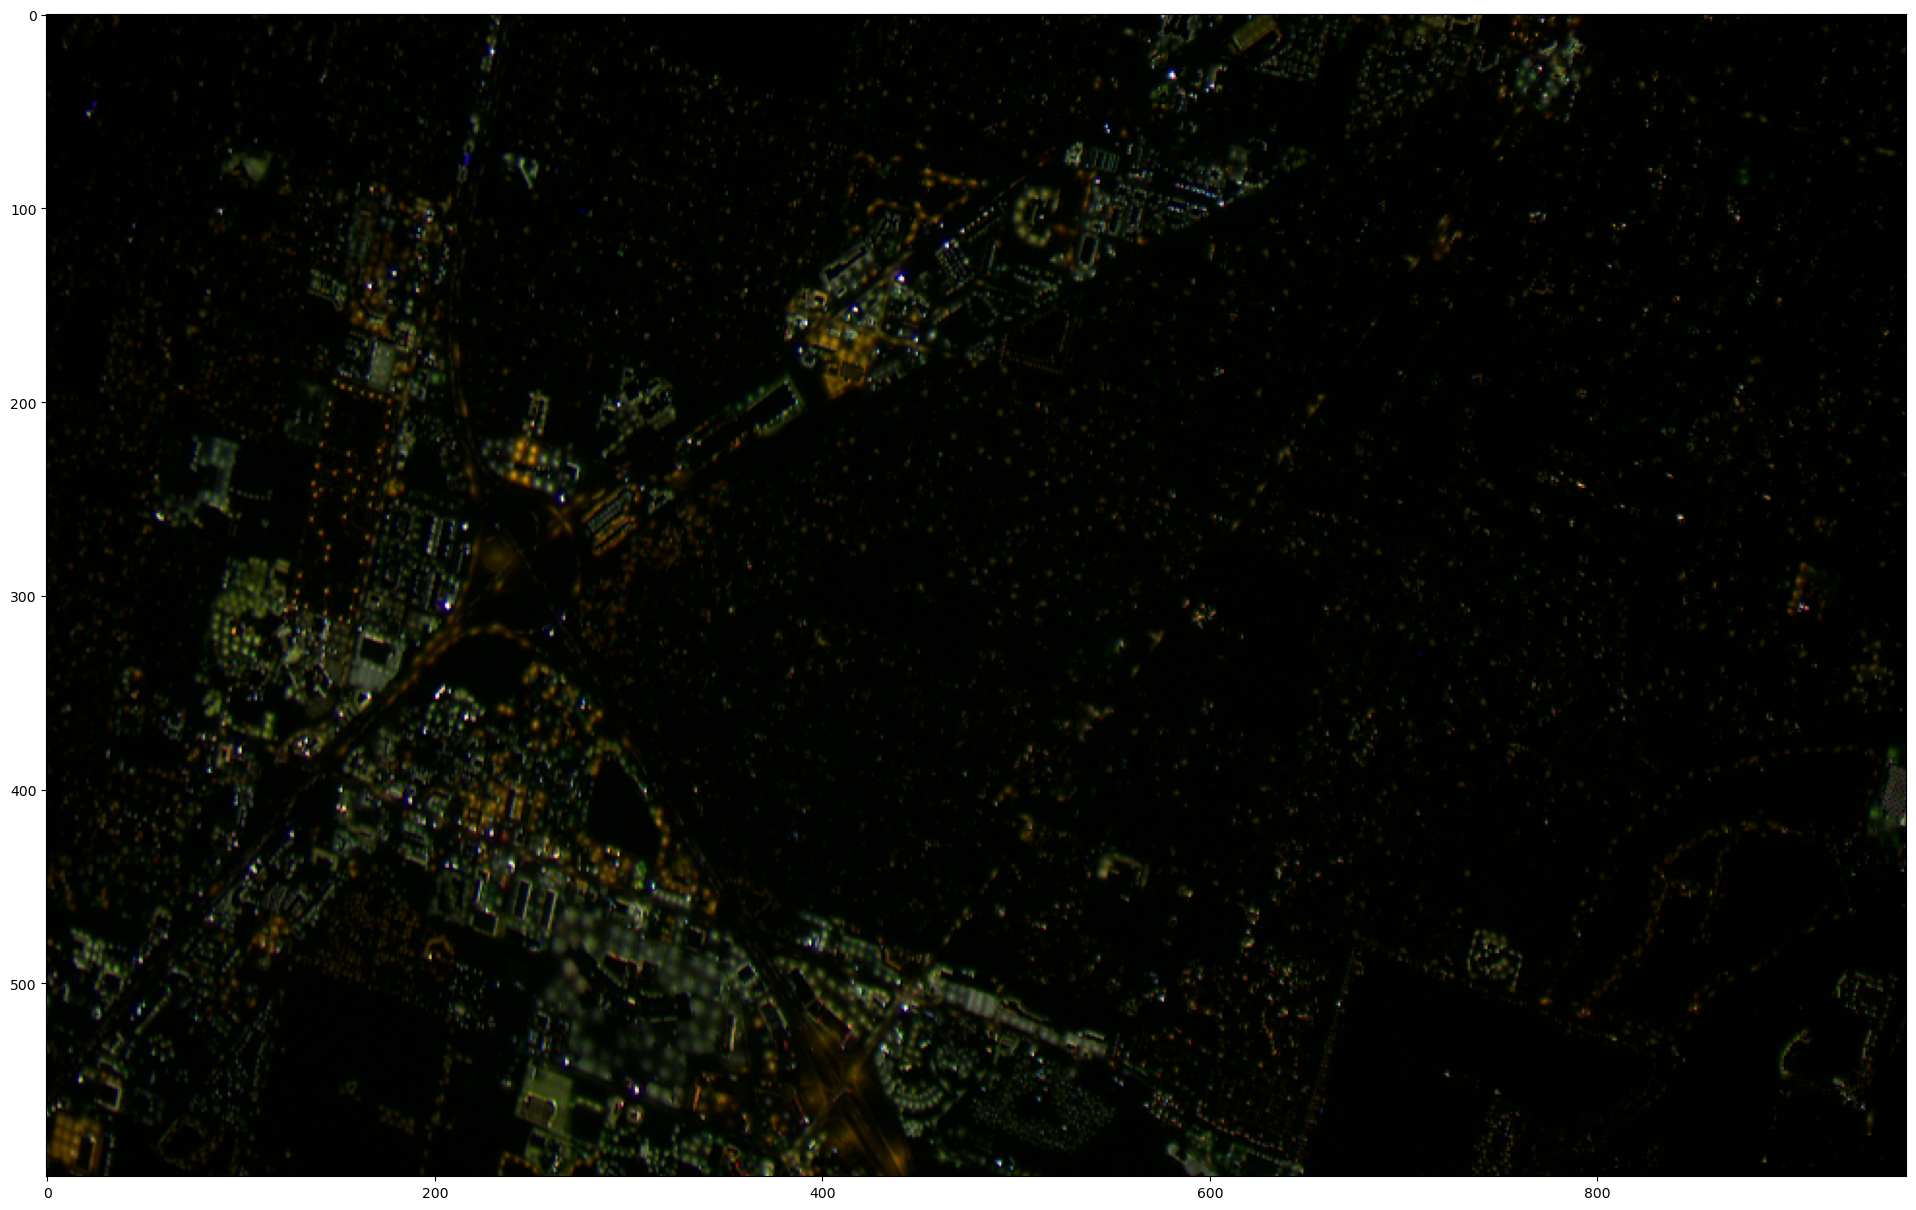

In [24]:
fig = plt.figure()
ax = plt.gca()

ax.imshow(
    crude_img,
)

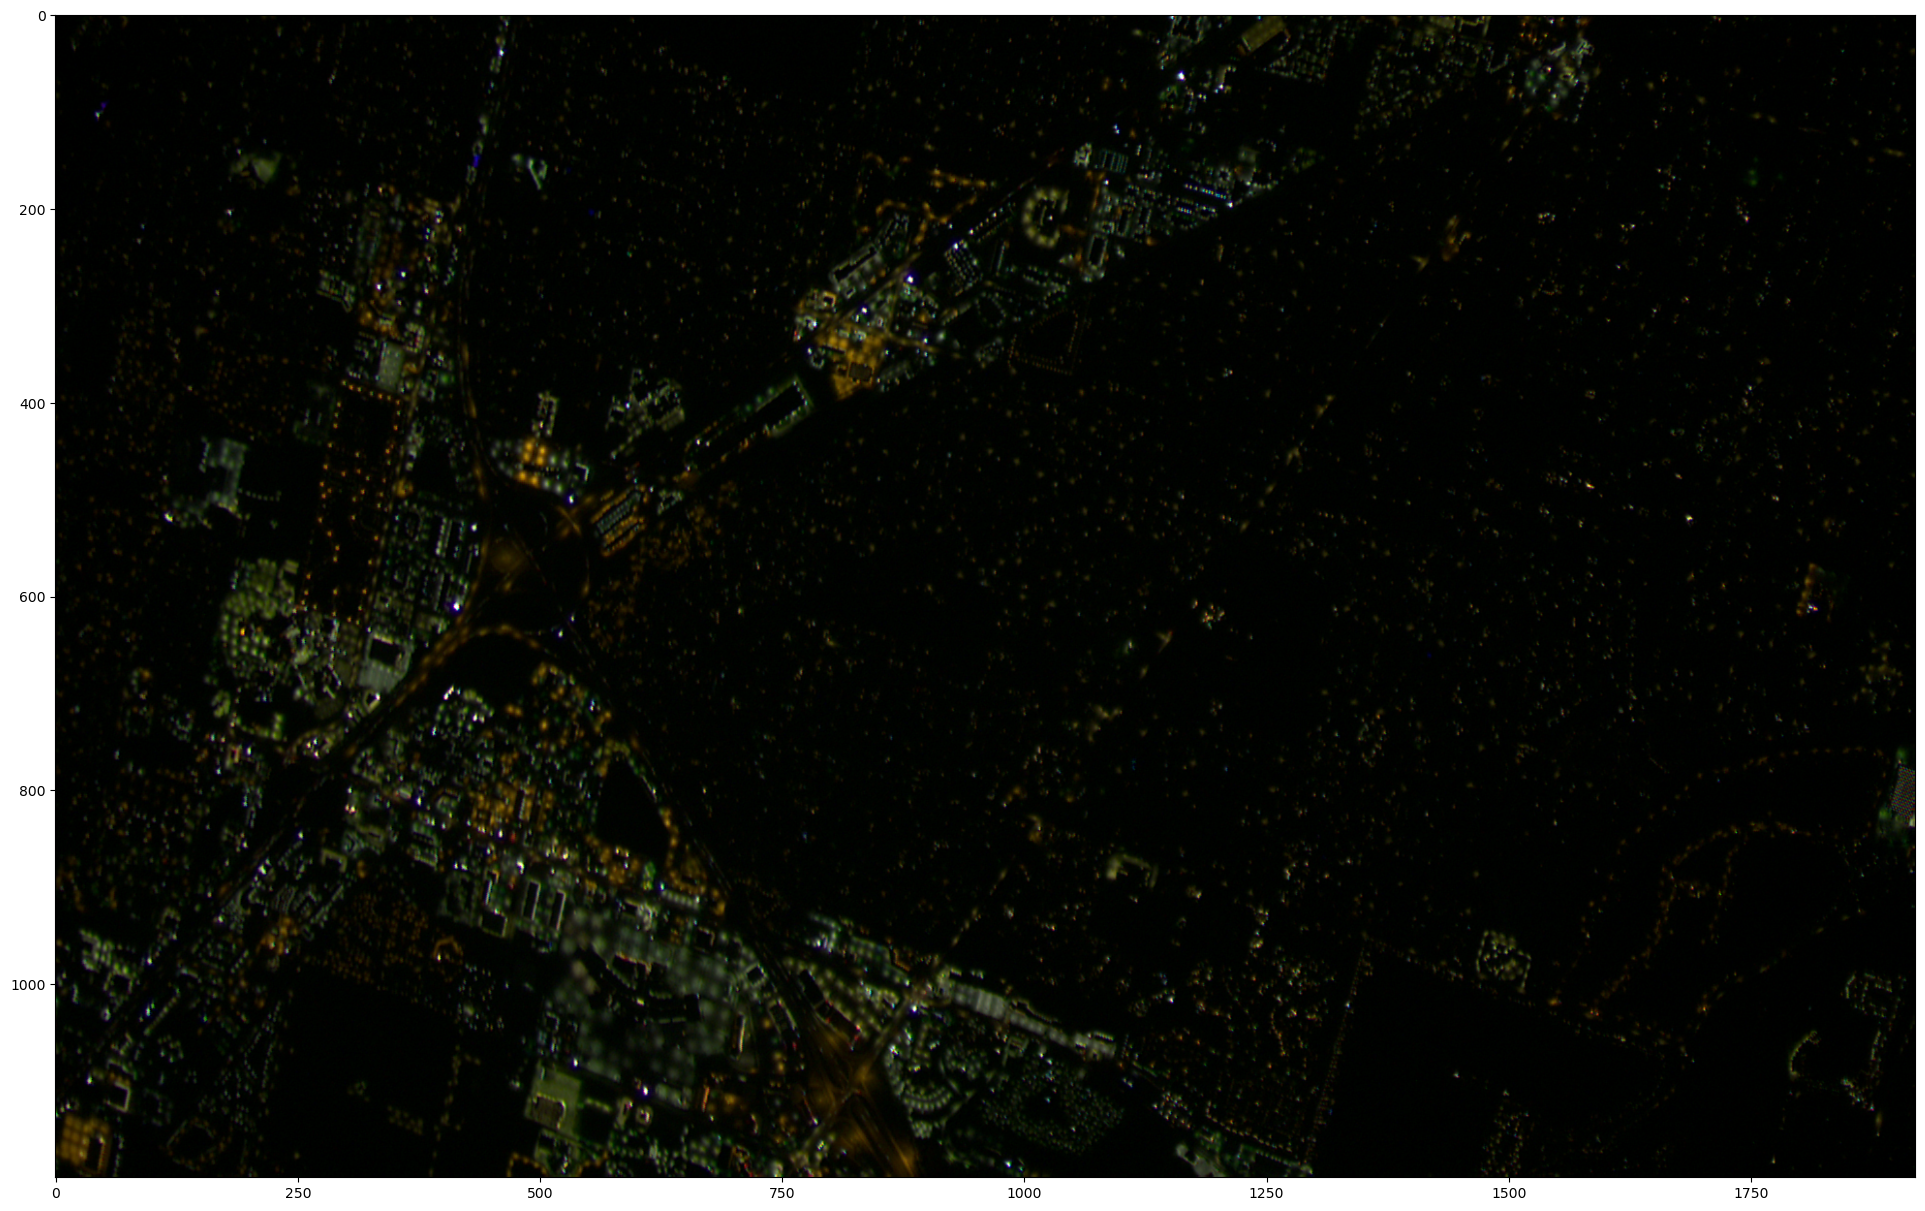

In [25]:
fig = plt.figure()
ax = plt.gca()

ax.imshow(
    img,
)